# AI(ARTIFICIAL INTELLIGENCE) GROUP WORK USING THE  PSEUDOCODE 

   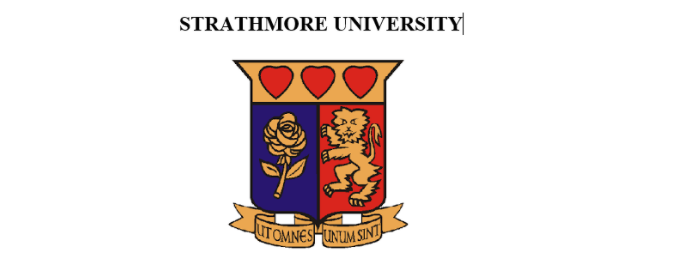

                                                    133834 Sarah Mongare
                                                    122790 Nicholas Bwalley
                                                    134879 Lesley Tulienge
                                                    133928 Millicent Cheptoi
                                                    124461 Angela Kinya
                                    Student (BBIT), School of Computing and Engineering Sciences, 
                                                 Strathmore University, Nairobi Kenya  

                                                submitted to:Desperia Kerrre

#### IMPORTING SOME LIBRARIES AND DEFING GRAPH

In [20]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 15 09:16:04 2022

@author: Tulienge
"""

from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens


# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

madaraka_map = UndirectedGraph(dict(
    sportComplex=dict(siwaka=450),
    siwaka=dict(phase1EntranceA=10, phase1EntranceB=230),
    phase1EntranceA=dict(phase1EntranceB=100, mada=850),
    phase1EntranceB=dict(STC=50, Phase2=112),
    STC=dict(Phase2=112, Parkinglot=250),
    Phase2=dict(J1=600, Phase3=500),
    J1=dict(mada=200),
    Phase3=dict(Parkinglot=350),
    mada=dict(Parkinglot=700)))

madaraka_map.locations = dict(
    sportComplex=(91, 492), siwaka=(200, 492), phase1EntranceA=(253, 492),
    phase1EntranceB=(253, 315), STC=(253, 193), Phase2=(305, 315),
    J1=(375, 315), Phase3=(375, 250), mada=(473, 315),
    Parkinglot=(375, 79))

strathmore_probleum = GraphProblem('Parkinglot','sportComplex' , madaraka_map)
strathmore_locations = madaraka_map.locations

# node colors, node positions and node label positions
node_colors = {node: 'white' for node in madaraka_map.locations.keys()}
node_positions = madaraka_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in madaraka_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in madaraka_map.graph_dict.items() for k2, v2 in v.items()}

madaraka_graph_data = {  'graph_dict' : madaraka_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

strathmore_map = UndirectedGraph(dict(
    sportComplex=dict(siwaka=325),
    siwaka=dict(phase1EntranceA=25, phase1EntranceB=125),
    phase1EntranceA=dict(phase1EntranceB=100, mada=250),
    phase1EntranceB=dict(STC=67, Phase2=70),
    STC=dict(Phase2=3, Parkinglot=213),
    Phase2=dict(J1=290, Phase3=50),
    J1=dict(mada=130),
    Phase3=dict(Parkinglot=160),
    mada=dict(Parkinglot=630)))

strathmore_map.locations = dict(
    sportComplex=(91, 492), siwaka=(200, 492), phase1EntranceA=(253, 492),
    phase1EntranceB=(253, 315), STC=(253, 193), Phase2=(305, 315),
    J1=(375, 315), Phase3=(375, 250), mada=(473, 315),
    Parkinglot=(375, 79))

strathmore_probleum = GraphProblem('Parkinglot','sportComplex' , strathmore_map)
strathmore_locations = strathmore_map.locations
#print(strathmore_locations)

# node colors, node positions and node label positions
node_colors = {node: 'white' for node in strathmore_map.locations.keys()}
node_positions = strathmore_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in strathmore_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in strathmore_map.graph_dict.items() for k2, v2 in v.items()}

strathmore_graph_data = {  'graph_dict' : strathmore_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }
#show_map(strathmore_graph_data)




#### QUESTION 1 BFS  (Best First Search) Algorithm- Visualize to show the paths

In [21]:
def breadth_first_search_graph(problem):
    "[psedocode 2]"
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = deque([node])
    
    # modify the color of frontier nodes to blue
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    while frontier:
        node = frontier.popleft()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)     
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None
all_node_colors = []
strathmore_problem = GraphProblem('sportComplex', 'Parkinglot', madaraka_map)
display_visual(madaraka_graph_data, user_input=False, 
            algorithm=breadth_first_search_graph, 
            problem=strathmore_problem)


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

#### QUESTION 2 Greedy BFS  (Best First Search) Algorithm- Visualize to show the paths

In [22]:
def greedy_best_first_search(problem, h=None):
    """Greedy Best-first graph search is an informative searching algorithm with f(n) = h(n).
    You need to specify the h function when you call best_first_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda n: h(n))
    return(iterations, all_node_colors, node)
all_node_colors = []
strathmore_probleum = GraphProblem('Parkinglot','sportComplex' , strathmore_map)
display_visual(strathmore_graph_data, user_input=False, 
               algorithm=greedy_best_first_search, 
               problem=strathmore_probleum)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

#### QUESTION 4 UCS  (Uniform Cost Search) Algorithm- Visualize to show the paths

In [23]:
def best_first_graph_search_for_vis(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < incumbent:
                    del frontier[child]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None
def uniform_cost_search_graph(problem):
    "[psedocode 3]"
    #Uniform Cost Search uses Best First Search algorithm with f(n) = g(n)
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda node: node.path_cost)
    return(iterations, all_node_colors, node)
all_node_colors = []
strathmore_probleum = GraphProblem('Parkinglot','sportComplex' , strathmore_map)
display_visual(strathmore_graph_data, user_input=False, 
               algorithm=uniform_cost_search_graph, 
               problem=strathmore_probleum)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…